## SKFlow Deep Neural Network on Parkinson's Disease Speech Dataset

https://archive.ics.uci.edu/ml/datasets/Parkinson+Speech+Dataset+with++Multiple+Types+of+Sound+Recordings

In [27]:
%matplotlib inline
import pandas as pd
import tensorflow as tf
import tensorflow.contrib.learn.python.learn as skflow
from sklearn import datasets, metrics
import numpy as np
import os.path
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import warnings; 
warnings.simplefilter('ignore')

In [2]:
### Sets multiple rows for a subject as more feature columns
def collapse_data(dataframe,featcol):
    newArray = []
    for sid in df_data.subject_id.unique():
        newArray.append(df_data[df_data.subject_id == sid][featcol].values.flatten().astype(np.float32))
    X = np.array(newArray)
    df_labels = df_data[["subject_id","class_information"]].drop_duplicates()["class_information"]
    Y = np.array(df_labels.iloc[:,]).astype(np.float32)
    return X,Y

### load or generate random ids for test and training sets
def slice_ids(length,run_id):
    idfile = "models/"+run_id+"_ids"
    if os.path.isfile(idfile): 
        ### Re-run model
        with open(idfile, 'rb') as fp:
            randomInd = pickle.load(fp)
    else:
        ### First run
        randomInd = np.random.permutation(length)
        with open(idfile, 'wb') as fp:
            pickle.dump(randomInd, fp)
    
    ###  70% of ids randomly selected for training
    ###  30% of ids randomly selected for testing
    mid = int(.7*length)
    trainidx = randomInd[:mid]
    testidx = randomInd[mid:]
    return trainidx, testidx

def run_DNNClassifier(run_id, steps = 100, hidden_units = [48, 24, 24]):
    ### Get Training and Testing indexes
    trainidx, testidx = slice_ids(len(X),run_id)

    ### Define classifier - DNN
    ### model_dir - this is where the model is saved. To re-run use the same runIdentifier
    feature_columns = skflow.infer_real_valued_columns_from_input(X)
    model = skflow.DNNClassifier(
        hidden_units=hidden_units, 
        n_classes= 3, # set to be the number of distinct categories of labels
        feature_columns=feature_columns,
        enable_centered_bias=True,
        model_dir="models/DNN/"+run_id)
    
    ### Fit Model
    model.fit(X[trainidx,:], 
              Y[trainidx].astype(np.int), 
              steps=steps)
    
    ### Evaluate Model
    y_p = model.predict(X[testidx,:])
    y_t = Y[testidx]
    return metrics.accuracy_score(y_t, y_p)

### Load data and convert to tensors

In [3]:
COLUMN_NAMES = ["subject_id", "jitter_local", "jitter_local_absolute", "jitter_rap", "jitter_ppq5",
                 "jitter_ddp","shimmer_local","shimmer_local_db","shimmer_apq3","shimmer_apq5",
                 "shimmer_apq11","shimmer_dda","ac","nth","htn","pitch_median","pitch_mean","pitch_stddev",
                 "pitch_min","pitch_max","number_of_pulses", "number_of_periods", "period_mean",
                 "period_stddev","locally_unvoiced_frames_fraction","number_of_voice_breaks",
                 "degree_of_voice_breaks","updrs","class_information"]

datafile = "data/train_data.txt"
df_data = pd.read_csv(datafile, names=COLUMN_NAMES, header=None)

### Create list of column names for feature data.
featcol = list(df_data.columns.values)
featcol.remove("subject_id")
featcol.remove("class_information")
featcol.remove("updrs")

In [4]:
### Convert data
X, Y = collapse_data(df_data,featcol)

### Run Some Different tests

In [67]:
%%time
print "Accuracy: {0}".format(run_DNNClassifier("model_26x26x26x26",steps=10000,hidden_units=[26,26,26,26]))

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


Accuracy: 0.583333333333
CPU times: user 24.8 s, sys: 8.71 s, total: 33.5 s
Wall time: 18.5 s


In [68]:
%%time
print "Accuracy: {0}".format(run_DNNClassifier("model_100x100x100",steps=10000,hidden_units=[100,100,100]))

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


Accuracy: 0.416666666667
CPU times: user 43.9 s, sys: 9.99 s, total: 53.9 s
Wall time: 21.2 s


In [69]:
%%time
print "Accuracy: {0}".format(run_DNNClassifier("model_100x26x100",steps=10000,hidden_units=[100,26,100]))

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


Accuracy: 0.416666666667
CPU times: user 39.9 s, sys: 9.66 s, total: 49.6 s
Wall time: 19.5 s


In [72]:
%%time
print "Accuracy: {0}".format(run_DNNClassifier("model_100x26x100_2",steps=10000,hidden_units=[100,26,100]))

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


Accuracy: 0.5
CPU times: user 40.4 s, sys: 9.6 s, total: 50 s
Wall time: 20 s


In [70]:
%%time
print "Accuracy: {0}".format(run_DNNClassifier("model_26",steps=10000,hidden_units=[26]))

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


Accuracy: 0.833333333333
CPU times: user 22.3 s, sys: 7.73 s, total: 30 s
Wall time: 15.9 s


In [74]:
%%time
print "Accuracy: {0}".format(run_DNNClassifier("model_26_2",steps=10000,hidden_units=[26]))

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


Accuracy: 0.583333333333
CPU times: user 21 s, sys: 7.25 s, total: 28.3 s
Wall time: 15 s


In [73]:
%%time
print "Accuracy: {0}".format(run_DNNClassifier("model_100",steps=10000,hidden_units=[100]))

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


Accuracy: 0.583333333333
CPU times: user 36.6 s, sys: 9.29 s, total: 45.9 s
Wall time: 16.9 s


In [71]:
%%time
print "Accuracy: {0}".format(run_DNNClassifier("model_4x4",steps=10000,hidden_units=[4,4]))

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


Accuracy: 0.25
CPU times: user 21.1 s, sys: 8.63 s, total: 29.8 s
Wall time: 16.2 s


### Test to see how shape of the graph affects accuracy

In [7]:
resultsfile = "models/accuracy.pickle"

def initData():
    if os.path.isfile(resultsfile): 
        data = loadData()
    else:
        data = []
        saveData(data)
    return data
    
def saveData(data):
    with open(resultsfile, 'wb') as fp:
        pickle.dump(data, fp)
        
def loadData():
    with open(resultsfile, 'rb') as fp:
        data = pickle.load(fp)
    return data

In [32]:
data = initData()
for i in range(len(data)+1,21):
    jdata = []
    for j in range(1,21):
        hidden_units=[i*10,j*10]
        model_name = "model_{0}x{1}".format(i*10,j*10)
        print model_name
        val = run_DNNClassifier(model_name,steps=1000,hidden_units=hidden_units)
        jdata.append(val)
    data.append(jdata)
    saveData(data)

In [17]:
data = initData()
results_df = pd.DataFrame(data, columns=range(0,20))

In [18]:
results_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.416667,0.416667,0.416667,0.500000,0.750000,0.333333,0.333333,0.250000,0.416667,0.416667,0.250000,0.833333,0.416667,0.666667,0.500000,0.416667,0.416667,0.416667,0.333333,0.583333
1,0.666667,0.500000,0.500000,0.666667,0.333333,0.500000,0.750000,0.666667,0.583333,0.500000,0.333333,0.416667,0.583333,0.416667,0.666667,0.333333,0.500000,0.833333,0.416667,0.833333
2,0.250000,0.666667,0.583333,0.666667,0.583333,0.416667,0.416667,0.333333,0.250000,0.583333,0.500000,0.416667,0.500000,0.500000,0.416667,0.666667,0.666667,0.500000,0.666667,0.666667
3,0.500000,0.666667,0.333333,0.500000,0.500000,0.416667,0.250000,0.416667,0.416667,0.500000,0.333333,0.583333,0.583333,0.666667,0.333333,0.500000,0.666667,0.500000,0.250000,0.500000
4,0.750000,0.250000,0.583333,0.750000,0.666667,0.500000,0.750000,0.250000,0.250000,0.416667,0.333333,0.500000,0.583333,0.750000,0.500000,0.666667,0.416667,0.666667,0.750000,0.666667
5,0.333333,0.416667,0.333333,0.583333,0.583333,0.833333,0.500000,0.583333,0.666667,0.500000,0.500000,0.750000,0.583333,0.666667,0.583333,0.750000,0.500000,0.500000,0.250000,0.583333
6,0.500000,0.416667,0.583333,0.416667,0.583333,0.333333,0.666667,0.500000,0.666667,0.750000,0.416667,0.750000,0.166667,0.416667,0.166667,0.583333,0.500000,0.333333,0.333333,0.583333
7,0.416667,0.416667,0.916667,0.666667,0.750000,0.583333,0.750000,0.500000,0.500000,0.666667,0.666667,0.750000,0.500000,0.500000,0.333333,0.500000,0.666667,0.583333,0.416667,0.416667
8,0.416667,0.500000,0.666667,0.666667,0.416667,0.666667,0.583333,0.666667,0.500000,0.750000,0.750000,0.250000,0.583333,0.416667,0.750000,0.583333,0.583333,0.583333,0.750000,0.666667
9,0.500000,0.500000,0.583333,0.666667,0.500000,0.416667,0.500000,0.583333,0.500000,0.583333,0.750000,0.416667,0.416667,0.333333,0.333333,0.500000,0.583333,0.583333,0.666667,0.500000


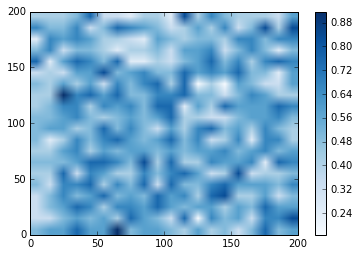

In [30]:
plt.imshow(data, 
           extent=(0, 200,0, 200), 
           cmap=cm.Blues,
           aspect='auto')
plt.colorbar()
plt.show()